# Task 3

1. Select tasks according to your variant.
2. Read the task carefully and determine what type of Student's test you will use. Justify.
3. Give a complete solution to the problem, including data visualization, where necessary.
Student's Criterion You must find it "manually" as well as using Python (or a similar
environment).
4. Draw a conclusion based on the solution.

### Variant 2
Because my student ID number is 8ПМ32422

## Task 1

Two batches of an alloy were tested to determine whether their melting points
(in ◦C) were significantly different. Altogether eight samples were taken from the first batch and
12 from the second. The results were as follows:

![img](../images/lab3_task1_data.png)

Carry out a significance test to determine whether the batches have different means.

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
A = np.array([571.6, 574.7, 574.2, 569.6, 570.8, 572.4, 573.7, 573.4])
A

array([571.6, 574.7, 574.2, 569.6, 570.8, 572.4, 573.7, 573.4])

In [63]:
B = np.array([574.1, 570.6, 573.3, 569.6, 572.3, 571.4, 568.9, 573.6, 568.7, 571.2, 572.7, 570.4])
B

array([574.1, 570.6, 573.3, 569.6, 572.3, 571.4, 568.9, 573.6, 568.7,
       571.2, 572.7, 570.4])

In [64]:
df = pd.concat([
    pd.DataFrame.from_dict({'value': A, 'name': 'A'}), 
    pd.DataFrame.from_dict({'value': B, 'name': 'B'})
])

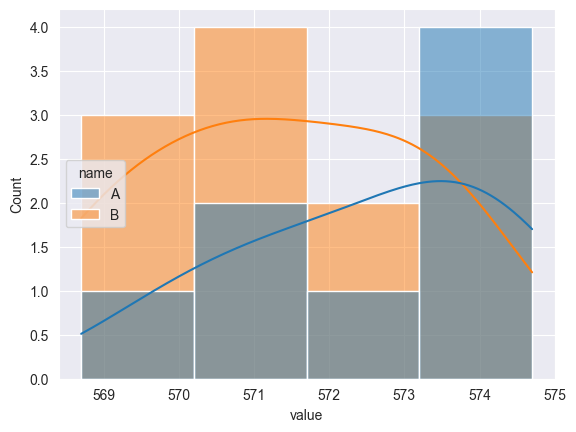

In [65]:
fig, ax = plt.subplots()
sns.histplot(df, x='value', hue='name', kde=True, bins=4, ax=ax)
sns.move_legend(ax, loc='center left')

In [66]:
(
    df.query("name == 'A'").shape,
    df.query("name == 'B'").shape,
)

((8, 2), (12, 2))

### Is samples is normally distributed?

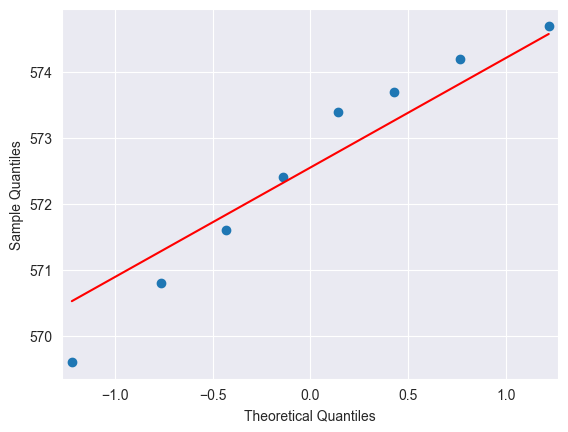

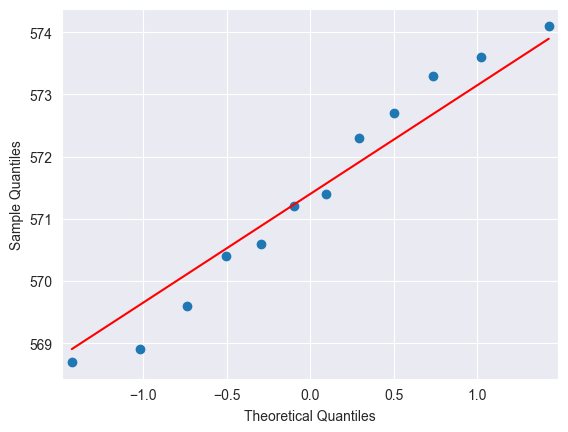

In [67]:
import statsmodels.api as sm

_ = sm.qqplot(data=df.query('name == "A"')['value'], loc=0, scale=1, line='s')
_ = sm.qqplot(data=df.query('name == "B"')['value'], loc=0, scale=1, line='s')

In [68]:
df.query('name == "B"').describe()

,value
count,12.000000
mean,571.400000
std,1.826572
min,568.700000
25%,570.200000
50%,571.300000
75%,572.850000
max,574.100000


In [69]:
df.query('name == "A"').describe()

,value
count,8.000000
mean,572.550000
std,1.776031
min,569.600000
25%,571.400000
50%,572.900000
75%,573.825000
max,574.700000


### Test for normality with Shapiro-Wilk test.

H0: sample is normally distributed
<br>
H1: sample is not normally distributed 

In [70]:
from scipy.stats import shapiro

shapiro(df.query('name == "A"')['value'])

ShapiroResult(statistic=0.9522823825955254, pvalue=0.7342072394382494)

In [71]:
shapiro(df.query('name == "B"')['value'])

ShapiroResult(statistic=0.9535286003566428, pvalue=0.6889970133396781)

Both p-value is greater than 0.05. Therefore, A B is normally distributed accordingly Shapiro-Wilk test.

Assume that A and B is norm distributed.

### Use F-test to determine if the two populations from which these samples are drawn have the same variance.

H0: both variances is equal
<br>
H1: variances is not equal 

In [72]:
vars = (
    np.var(df.query('name == "A"')['value']),
    np.var(df.query('name == "B"')['value'])
)
vars

(2.76000000000005, 3.0583333333333216)

In [73]:
Fc = max(vars)/min(vars)
Fc

1.1080917874395892

In [74]:
from scipy.stats import f
p = f.cdf(Fc, df.query('name == "A"').shape[0], df.query('name == "B"').shape[0])
p

0.5789159963463146

In [75]:
Fc > p

True

Variances is equal

### Use T-test to determine if means of A and B are equals. 

H0: mean(A) == mean(B)
<br>
H1: mean(A) != mean(B)

In [76]:
from scipy.stats import ttest_ind

ttest_ind(df.query('name == "A"')['value'], df.query('name == "B"')['value'], equal_var=True)

TtestResult(statistic=1.3942476485954958, pvalue=0.18021570005012083, df=18.0)

### Summary: Batches have same means.

## Task 2

Two similar machines make products. On the basis of measurements of products made by
machines, with a confidence probability of 0.95, verify the hypothesis that the nominal sizes of
products (mathematical expectations) produced by different machines are equal.

1. Выберите задания, согласно своего варианта.
2. Прочитайте внимательно задание и определите – как тип критерия Стъюдента Вы
будете использовать. Обоснуйте.
3. Приведите полное решение задачи, включающее визуализацию данных, где это
необходимо. Критерий Стъюдента Вы должны найти «вручную», а также,
используя Python (или аналогичную среду).
4. Сделайте вывод по полученному решению.

|           |      |      |      |      |      |      |      |      |      |      |      |      |      |      |      |
|-----------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|------|
| Machine A | 23.1 | 22.8 | 22.6 | 20.4 | 21.4 | 22.5 | 21.4 | 22.3 | 22.3 | 22.0 | 21.4 | 22.9 | 23.0 | 22.6 | 21.6 |
|           | 22.8 | 22.5 | 23.1 | 22.8 | 22.6 | 20.4 | 21.4 | 22.5 | 21.4 | 22.3 | 22.3 | 22.0 | 21.4 | 23.1 | 22.8 |
| Machine B | 22.3 | 23.3 | 22.2 | 23.2 | 22.9 | 23.1 | 22.5 | 23.1 | 22.6 | 23.2 | 22.3 | 22.3 | 22.0 | 21.9 | 23.0 |
|           | 23.1 | 22.5 | 23.1 | 22.6 | 23.2 | 22.3 | 22.3 | 22.0 | 21.9 | 23.0 | 22.7 | 22.3 | 23.3 | 22.2 | 23.2 |

In [77]:
A = np.array([23.1, 22.8, 22.6, 20.4, 21.4, 22.5, 21.4, 22.3, 22.3, 22.0, 21.4, 22.9, 23.0, 22.6, 21.6,
22.8, 22.5, 23.1, 22.8, 22.6, 20.4, 21.4, 22.5, 21.4, 22.3, 22.3, 22.0, 21.4, 23.1, 22.8])
A

array([23.1, 22.8, 22.6, 20.4, 21.4, 22.5, 21.4, 22.3, 22.3, 22. , 21.4,
       22.9, 23. , 22.6, 21.6, 22.8, 22.5, 23.1, 22.8, 22.6, 20.4, 21.4,
       22.5, 21.4, 22.3, 22.3, 22. , 21.4, 23.1, 22.8])

In [78]:
B = np.array([22.3, 23.3, 22.2, 23.2, 22.9, 23.1, 22.5, 23.1, 22.6, 23.2, 22.3, 22.3, 22.0, 21.9, 23.0,
23.1, 22.5, 23.1, 22.6, 23.2, 22.3, 22.3, 22.0, 21.9, 23.0, 22.7, 22.3, 23.3, 22.2, 23.2])
B

array([22.3, 23.3, 22.2, 23.2, 22.9, 23.1, 22.5, 23.1, 22.6, 23.2, 22.3,
       22.3, 22. , 21.9, 23. , 23.1, 22.5, 23.1, 22.6, 23.2, 22.3, 22.3,
       22. , 21.9, 23. , 22.7, 22.3, 23.3, 22.2, 23.2])

In [79]:
df = pd.concat([
    pd.DataFrame.from_dict({'value': A, 'name': 'A'}),
    pd.DataFrame.from_dict({'value': B, 'name': 'B'})
])

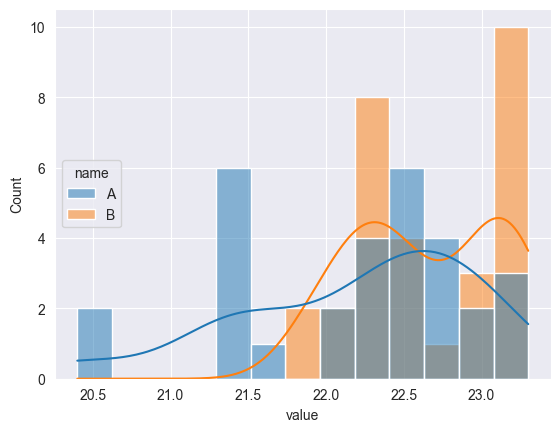

In [80]:
fig, ax = plt.subplots()
sns.histplot(df, x='value', hue='name', kde=True, bins=13, ax=ax)
sns.move_legend(ax, loc='center left')

In [81]:
(
    df.query("name == 'A'").shape,
    df.query("name == 'B'").shape,
)

((30, 2), (30, 2))

### Is samples is normally distributed?

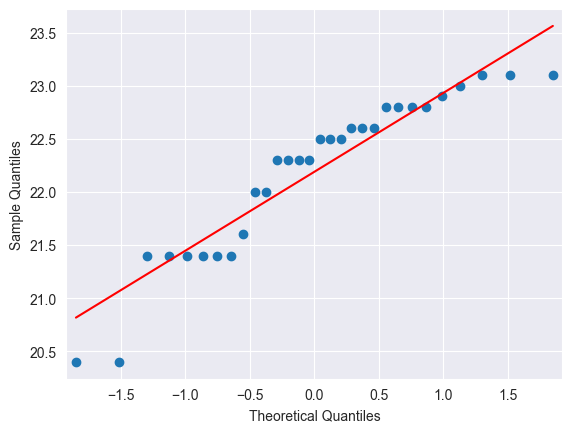

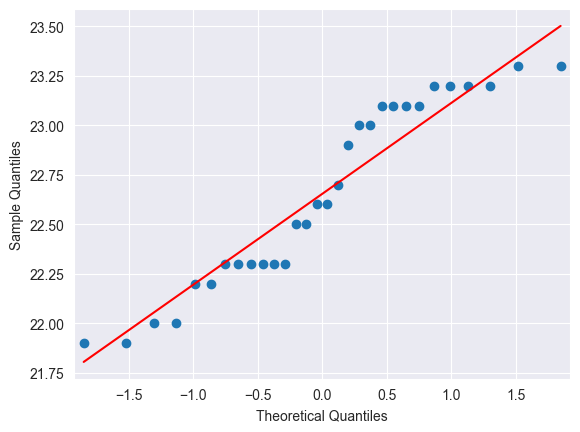

In [82]:
import statsmodels.api as sm

_ = sm.qqplot(data=df.query('name == "A"')['value'], loc=0, scale=1, line='s')
_ = sm.qqplot(data=df.query('name == "B"')['value'], loc=0, scale=1, line='s')

In [83]:
df.query('name == "A"').describe()

,value
count,30.000000
mean,22.190000
std,0.755372
min,20.400000
25%,21.450000
50%,22.400000
75%,22.800000
max,23.100000


In [84]:
df.query('name == "B"').describe()

,value
count,30.000000
mean,22.653333
std,0.467372
min,21.900000
25%,22.300000
50%,22.600000
75%,23.100000
max,23.300000


### Test for normality with Shapiro-Wilk test.

H0: sample is normally distributed
<br>
H1: sample is not normally distributed 

In [85]:
shapiro(df.query('name == "A"')['value'])

ShapiroResult(statistic=0.8926196093345596, pvalue=0.005568790577583462)

In [86]:
shapiro(df.query('name == "B"')['value'])

ShapiroResult(statistic=0.9018747087141462, pvalue=0.009336784565532504)

Both p-value is less than 0.05. Therefore, A B is not normally distributed accordingly Shapiro-Wilk test.

In [87]:
# todo выбрать подходящий критерий (критерий знаков, критерий Вилкоксона, критерий Крамера-Уэлча)
# todo возможно сделать предположение, что выборки при увеличении количества наблюдений будут стремиться к нормальному